In [2]:
import networkx as nx

In [13]:
# create a graph
G = nx.Graph()
G.add_node(5)     #add single node
G.add_nodes_from([1,2,'u','v'])    #add multiple nodes
G.nodes()    #query nodes

G.add_edge(1,2)    #add an edge
G.add_edges_from([('u','v'),(1,5),(1,6)])    # add multiple edges
G.add_edge('u','w')
G.edges()

print(G.number_of_nodes())
print(G.number_of_edges())

7
5


34
78


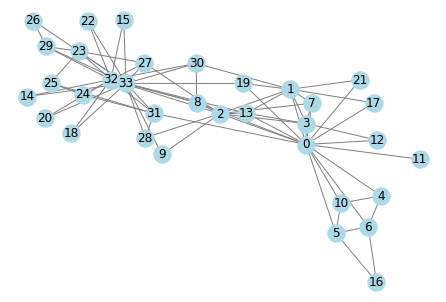

In [27]:
#visualizing a Graph
G = nx.karate_club_graph()
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='grey')
plt.savefig('sample_graph.pdf')
#G.degree()    #view degrees of nodes
print(G.number_of_nodes())
print(G.number_of_edges())

In [28]:
G.degree(0) is G.degree()[0]

True

In [32]:
# Coin flip simulation
from scipy.stats import bernoulli
bernoulli.rvs(p = 0.2)

0

In [37]:
def ERgraph(N,p):
    """Generate an Erdos-Renyi graph"""
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():    #loop through 2  nodes to create an edge
        for node2 in G.nodes():
            if (node1<node2) and bernoulli.rvs(p=p):    #node1<node2 ensures that node pairs are not repeated
                G.add_edge(node1,node2)
    return G
        

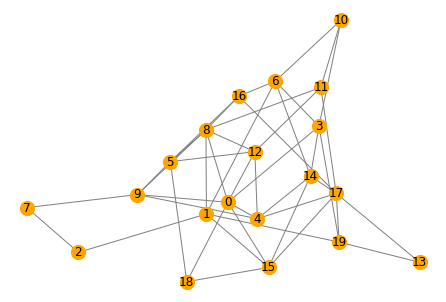

In [47]:
G = ERgraph(20,0.2)
nx.draw(G, with_labels=True, node_size=200,node_color='orange', edge_color='grey')

15

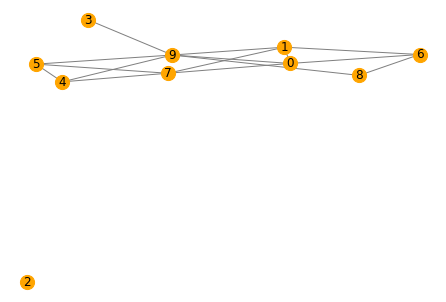

In [62]:
G = ERgraph(10,0.3)
nx.draw(G, with_labels=True, node_size=200,node_color='orange', edge_color='grey')
G.number_of_edges()

In [57]:
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel('Degree $k$')
    plt.ylabel('$P(k)$')
    plt.title('Degree distribution')

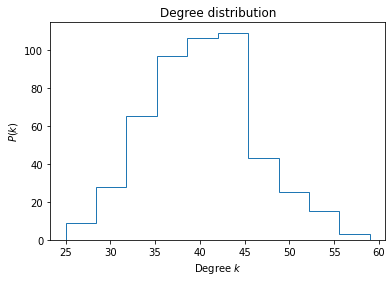

In [64]:
plot_degree_distribution(ERgraph(500,0.08))

In [70]:
import numpy as np

# Create graphs using network adjacency matrices
A1 = np.loadtxt('adj_allVillageRelationships_vilno_1.csv', delimiter = ',')
A2 = np.loadtxt('adj_allVillageRelationships_vilno_2.csv', delimiter = ',')

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [89]:
def basic_net_stats(G):
    """function to print simple stats of a network"""
    print('Number of nodes is: %d' % G.number_of_nodes())
    print('Number of edges is: %d' % G.number_of_edges())
    values=[]
    for i in G.degree:
        values.append(i[1])
    print('Mean degree is: %.2f' % np.mean(values))

In [90]:
basic_net_stats(G1)
basic_net_stats(G2)

Number of nodes is: 843
Number of edges is: 3405
Mean degree is: 8.08
Number of nodes is: 877
Number of edges is: 3063
Mean degree is: 6.99


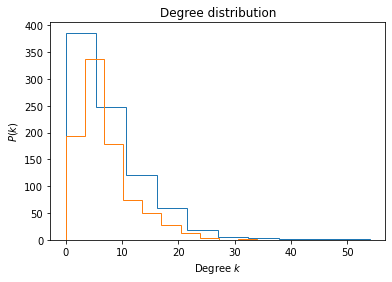

In [92]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)

In [117]:
# Find the largest connected component
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [118]:
G1_LCC = max(connected_component_subgraphs(G1), key=len)
G2_LCC = max(connected_component_subgraphs(G2), key=len)

In [120]:
# largest connected component
print('Nodes in largest connected component of G1 is %d' % G1_LCC.number_of_nodes())
print('Nodes in largest connected component of G2 is %d' % G2_LCC.number_of_nodes())

Nodes in largest connected component of G1 is 825
Nodes in largest connected component of G2 is 810


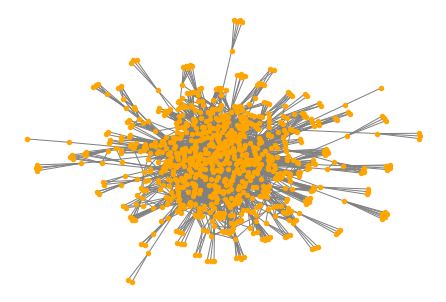

In [123]:
nx.draw(G1_LCC, node_size=20,node_color='orange', edge_color='grey')

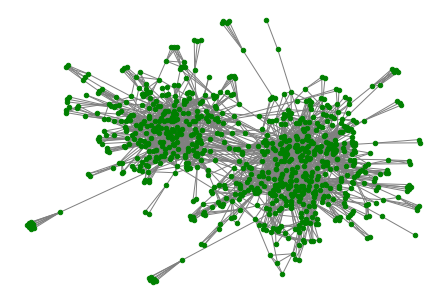

In [124]:
nx.draw(G2_LCC, node_size=20,node_color='green', edge_color='grey')

In [125]:
print(G1_LCC.number_of_nodes() / G1.number_of_nodes())
print(G2_LCC.number_of_nodes() / G2.number_of_nodes())

0.9786476868327402
0.9236031927023945
